<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/Loan-status-prediction/blob/master/Artificial_Neural_Network_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

iloc index based slicing where as loc is label based there are 5 sheets in dataset ,while reading default is zero so it read only 1st sheet

In [ ]:
print(X)
print(Y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)
print(X_test)
print(Y_train,Y_test)

[[  11.22   43.13 1017.24   80.9 ]
 [  13.67   54.3  1015.92   75.42]
 [  32.84   77.95 1014.68   45.8 ]
 ...
 [  16.81   38.52 1018.26   75.21]
 [  12.8    41.16 1022.43   86.19]
 [  32.32   67.9  1006.08   37.93]]
[[  28.66   77.95 1009.56   69.07]
 [  17.48   49.39 1021.51   84.53]
 [  14.86   43.14 1019.21   99.14]
 ...
 [  12.24   44.92 1023.74   88.21]
 [  27.28   47.93 1003.46   59.22]
 [  17.28   39.99 1007.09   74.25]]
[473.93 467.87 431.97 ... 459.01 462.72 428.12] [431.23 460.01 461.14 ... 473.26 438.   463.28]


## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

Adding another hidden layer

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

stochastic gradient decent:Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.”

Adam realizes the benefits of both Adaptive Gradient Algorithm and Root Mean Square Propagation

In [ ]:
model=ann.fit(X_train, Y_train, batch_size = 32, epochs = 150)

Epoch 1/150
240/240 [==============================] - 1s 2ms/step - loss: 42341.9102
Epoch 2/150
240/240 [==============================] - 0s 2ms/step - loss: 121.3792
Epoch 3/150
240/240 [==============================] - 0s 2ms/step - loss: 107.4015
Epoch 4/150
240/240 [==============================] - 0s 2ms/step - loss: 98.8448
Epoch 5/150
240/240 [==============================] - 0s 2ms/step - loss: 89.3658
Epoch 6/150
240/240 [==============================] - 0s 2ms/step - loss: 79.3141
Epoch 7/150
240/240 [==============================] - 0s 2ms/step - loss: 69.9268
Epoch 8/150
240/240 [==============================] - 0s 2ms/step - loss: 61.4622
Epoch 9/150
240/240 [==============================] - 0s 2ms/step - loss: 54.8943
Epoch 10/150
240/240 [==============================] - 0s 2ms/step - loss: 49.6386
Epoch 11/150
240/240 [==============================] - 0s 2ms/step - loss: 46.0925
Epoch 12/150
240/240 [==============================] - 0s 2ms/step - loss: 44.2

### Predicting the results of the Test set

In [ ]:
y_pred = ann.predict(X_test)


In [ ]:
np.set_printoptions(precision=2)

In [ ]:
print(y_pred)

[[430.08]
 [459.59]
 [464.41]
 ...
 [471.44]
 [436.47]
 [456.52]]


In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[430.08 431.23]
 [459.59 460.01]
 [464.41 461.14]
 ...
 [471.44 473.26]
 [436.47 438.  ]
 [456.52 463.28]]


Text(0, 0.5, 'Loss')

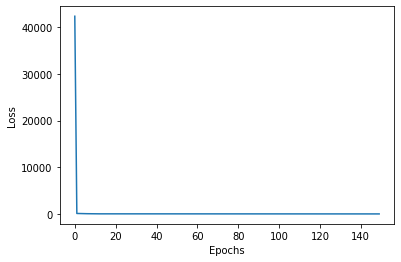

In [ ]:
plt.plot(model.history['loss'])

plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
model.history

{'loss': [42341.91015625,
  121.37918853759766,
  107.40147399902344,
  98.84481048583984,
  89.36580657958984,
  79.31414794921875,
  69.92676544189453,
  61.46215057373047,
  54.894264221191406,
  49.63857650756836,
  46.092525482177734,
  44.24643325805664,
  42.2445182800293,
  42.11243438720703,
  40.8105583190918,
  40.64179229736328,
  40.636802673339844,
  38.816341400146484,
  38.14347457885742,
  37.12322235107422,
  37.74071502685547,
  36.91218566894531,
  35.32756805419922,
  35.19416809082031,
  34.466766357421875,
  35.71255111694336,
  34.73755645751953,
  32.208030700683594,
  31.724721908569336,
  31.858495712280273,
  33.63975143432617,
  31.478595733642578,
  31.182743072509766,
  30.443012237548828,
  31.47341537475586,
  30.11128044128418,
  30.708284378051758,
  29.461336135864258,
  30.258892059326172,
  29.653005599975586,
  29.2519588470459,
  28.899076461791992,
  29.247819900512695,
  30.437984466552734,
  28.856441497802734,
  29.208850860595703,
  28.04772

Text(0, 0.5, 'Predicted values')

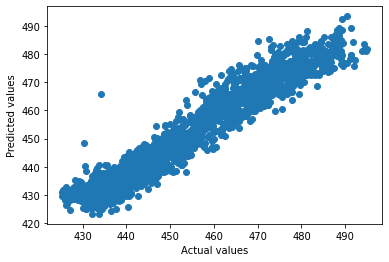

In [ ]:
plt.scatter(Y_test,y_pred)

plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [ ]:
dataset = pd.read_excel('Folds5x2_pp.xlsx',sheet_name='Sheet2')
test_x= dataset.iloc[:,:-1].values
test_y= dataset.iloc[:,-1].values

In [ ]:
testing=ann.predict(test_x)

Text(0.5, 1.0, 'Predictions for another set')

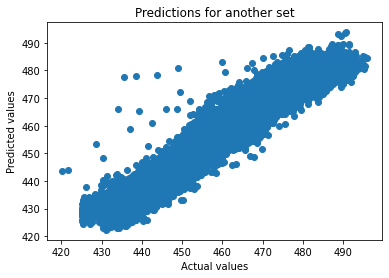

In [ ]:
plt.scatter(test_y,testing)

plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.title("Predictions for another set")